<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/Austism_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# To work with categorical features
from imblearn.over_sampling import SMOTE
# Synthetic Minority Over Sampling Techinque
from sklearn.model_selection import train_test_split,cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import pickle

In [ ]:
# Data Loading and Understanding
df=pd.read_csv("/content/Autism_Dataset.csv")

In [ ]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
df.shape

(800, 22)

In [ ]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [ ]:
# display all columns
pd.set_option('display.max_columns', None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
df['age']=df['age'].astype(int)

In [ ]:
for col in df.columns:
  numerical_features=["ID","age","result"]
  if col not in numerical_features:
    print(col,df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [ ]:
# dropping id and age_desc
df=df.drop(columns=['ID','age_desc'])

In [ ]:
df.shape

(800, 20)

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [ ]:
#define mapping dictionary for country names
mapping={
    'Viet Nam':'Vietnam',
    'AmericanSamoa':'USA',
    'Hong Kong':'China'
}

# replace value in country column
df['contry_of_res']=df['contry_of_res'].replace(mapping)

In [ ]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'USA', 'Bahamas', 'Saudi Arabia', 'Ireland',
       'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [ ]:
# target class distribution
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


In [ ]:
# Insights
# 1. Missing Values
# 2. Age desc column has only 1 unique value so removed
# 3. Fixed country names
# 4. Class imbalance in target column

In [ ]:
# Exploratory Data Analysis
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [ ]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


In [ ]:
# Univariate Analysis
# set the desirec theme
sns.set_theme(style='darkgrid',palette='deep')

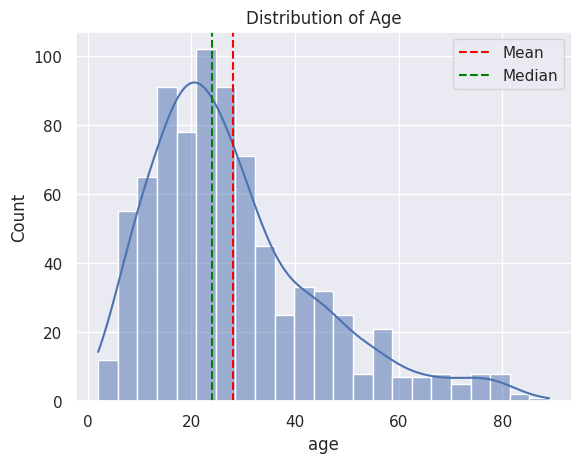

In [ ]:
# Distribution plots
sns.histplot(df['age'],kde=True)
plt.title("Distribution of Age")
# Calculate mean and median
age_mean=df['age'].mean()
age_median=df['age'].median()

# add vertical lines for mean and median
plt.axvline(age_mean,color='red',linestyle='dashed',label='Mean')
plt.axvline(age_median,color='green',linestyle='dashed',label='Median')
plt.legend()
plt.show()

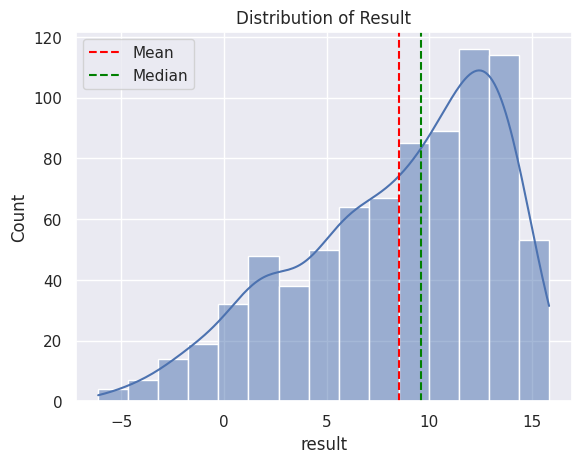

In [ ]:
# Distribution plots
sns.histplot(df['result'],kde=True)
plt.title("Distribution of Result")
# Calculate mean and median
res_mean=df['result'].mean()
res_median=df['result'].median()

# add vertical lines for mean and median
plt.axvline(res_mean,color='red',linestyle='dashed',label='Mean')
plt.axvline(res_median,color='green',linestyle='dashed',label='Median')
plt.legend()
plt.show()

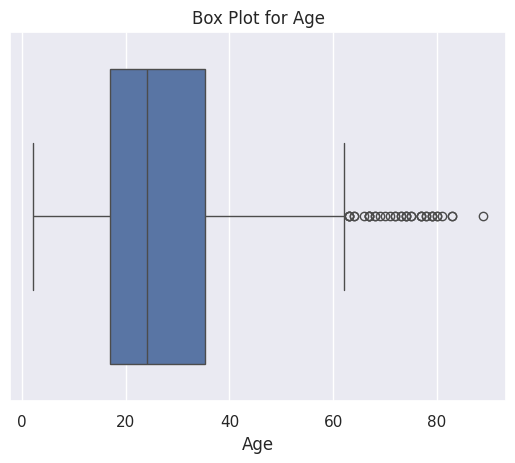

In [ ]:
# Box Plot for identifing outliers in numerical columns
sns.boxplot(x=df['age'])
plt.title('Box Plot for Age')
plt.xlabel('Age')
plt.show()

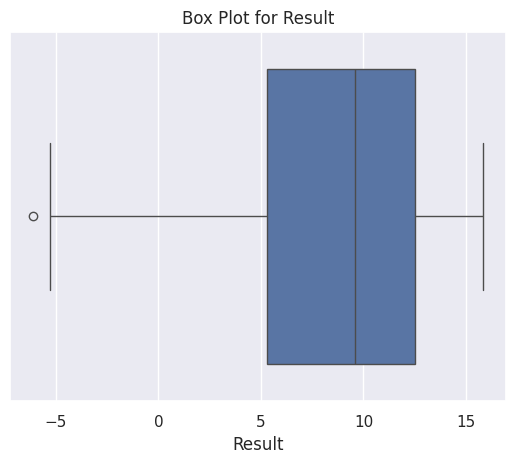

In [ ]:
# Box Plot for identifing outliers in numerical columns
sns.boxplot(x=df['result'])
plt.title('Box Plot for Result')
plt.xlabel('Result')
plt.show()

In [ ]:
# count outliers
q1=df['age'].quantile(0.25)
q3=df['age'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
age_outliers=df[(df['age']<lower_bound) | (df['age']>upper_bound)]
age_outliers

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
19,1,1,1,1,1,1,1,1,1,1,72,m,White-European,no,yes,United States,yes,12.286905,Self,1
31,0,1,0,0,0,0,0,1,0,0,74,f,Asian,no,no,Jordan,no,2.412387,Self,0
33,1,1,1,1,1,1,1,0,1,1,67,m,White-European,yes,no,New Zealand,no,11.647281,Self,0
41,1,1,1,1,1,0,1,1,1,1,74,m,White-European,no,no,United Kingdom,no,7.387992,Self,0
92,0,1,1,1,1,1,0,1,1,1,75,m,Latino,no,yes,United States,no,6.699799,Self,0
93,0,0,0,0,0,0,0,0,0,0,79,m,?,no,no,India,no,7.813125,Self,0
161,1,1,1,1,1,1,1,1,1,1,79,f,White-European,yes,yes,United States,no,10.482143,Self,0
231,1,1,1,1,1,1,1,1,1,1,69,f,White-European,no,no,United States,no,2.459004,Self,1
238,1,1,1,1,1,0,1,1,1,1,64,f,Latino,yes,no,Australia,no,13.756476,Self,1
241,0,0,0,0,0,0,0,0,1,0,64,f,others,no,no,Jordan,no,2.142376,Self,0


In [ ]:
age_outliers.shape

(39, 20)

In [ ]:
# count outliers
q1=df['result'].quantile(0.25)
q3=df['result'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
result_outliers=df[(df['result']<lower_bound) | (df['result']>upper_bound)]
result_outliers

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
698,0,0,0,0,0,0,0,0,0,0,62,f,Asian,no,no,Jordan,no,-6.137748,Self,0


In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

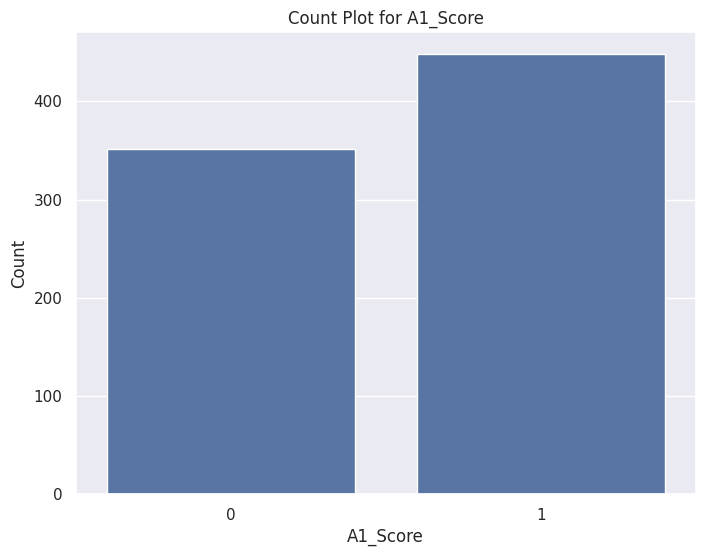

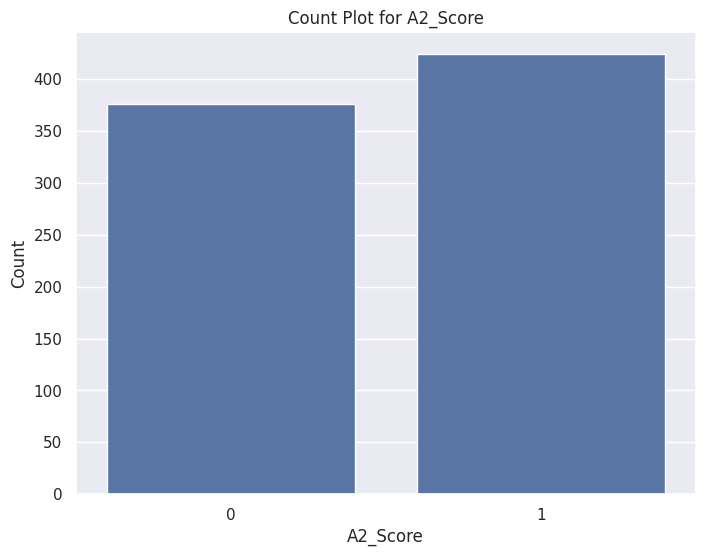

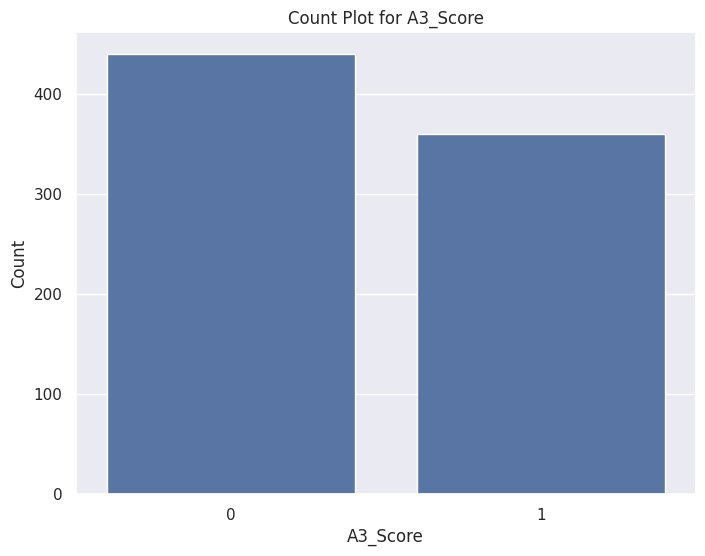

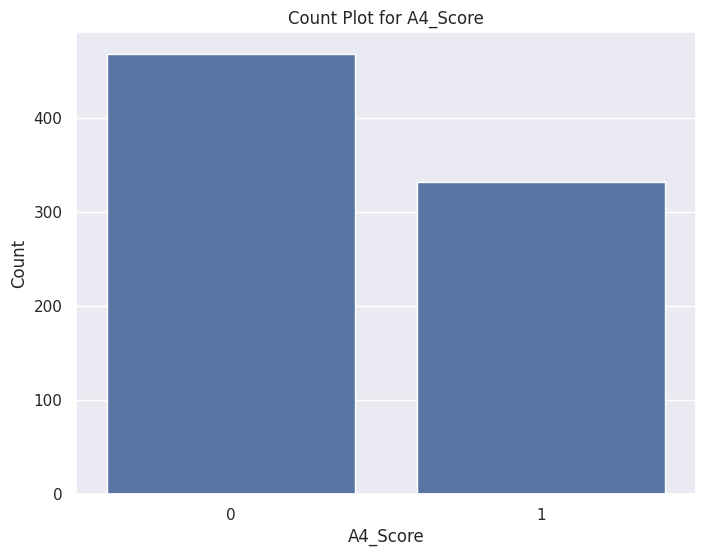

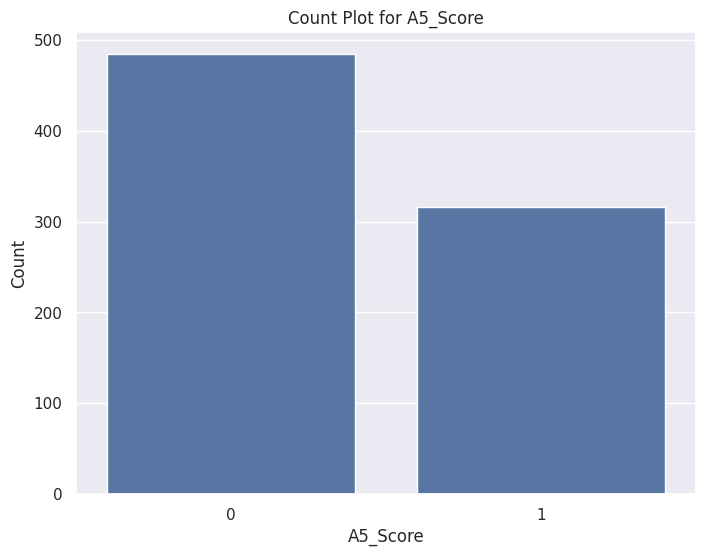

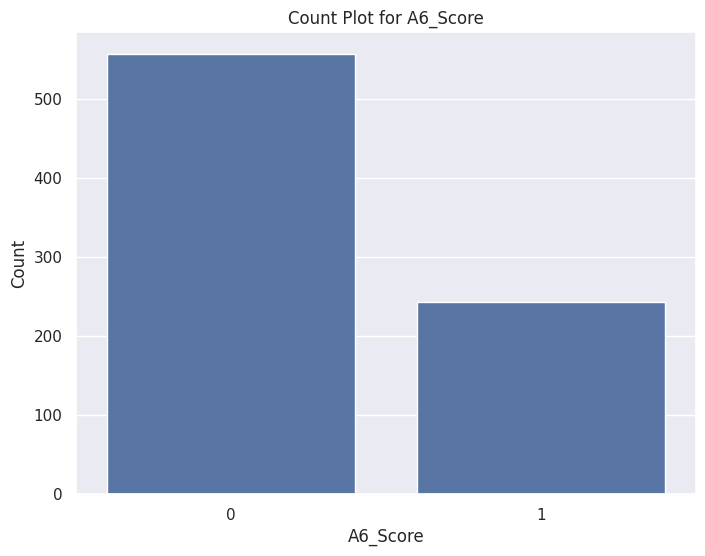

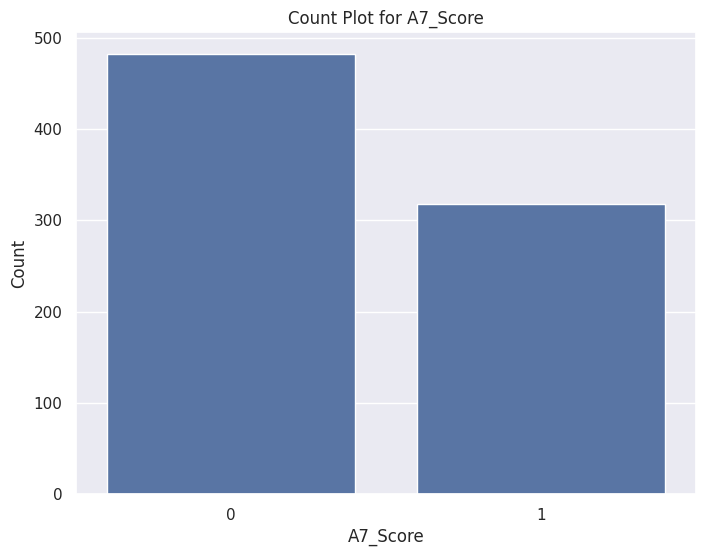

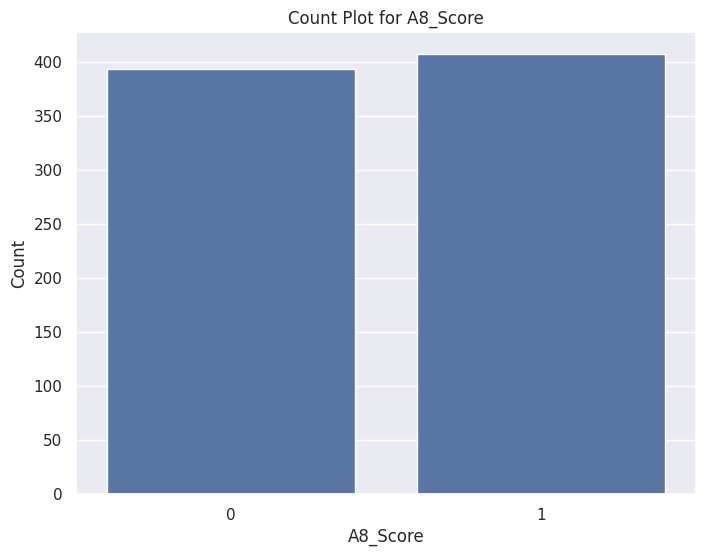

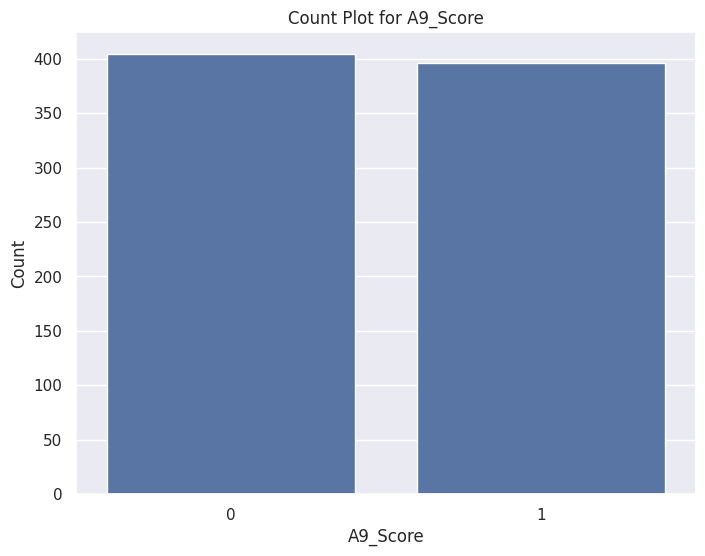

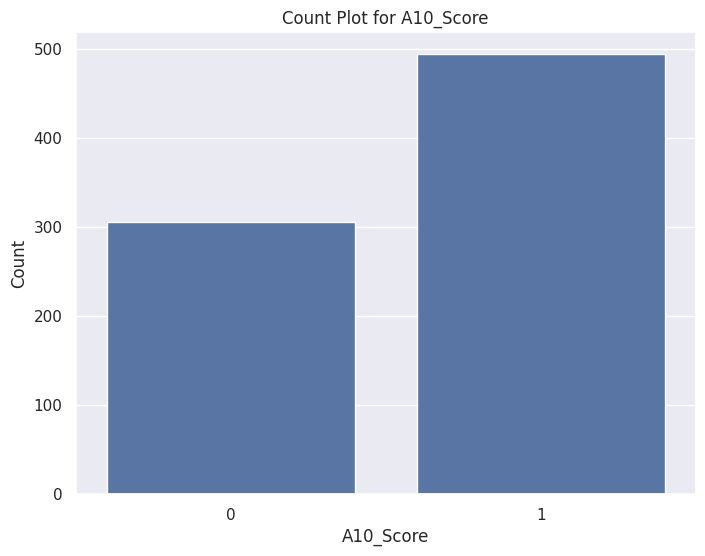

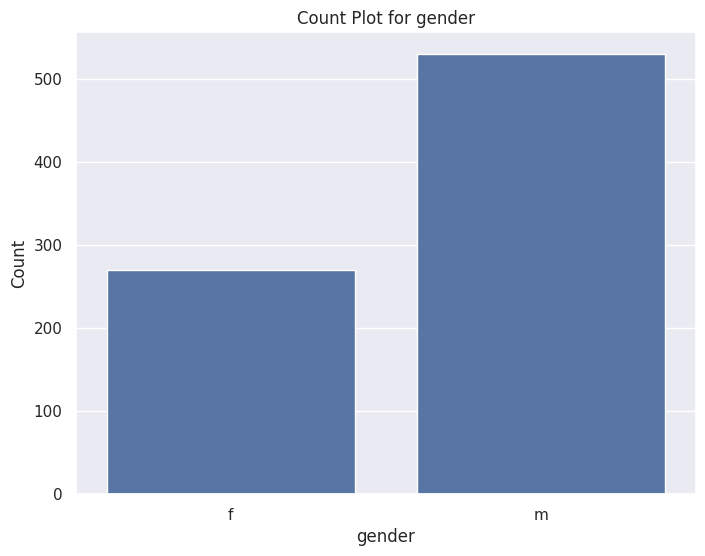

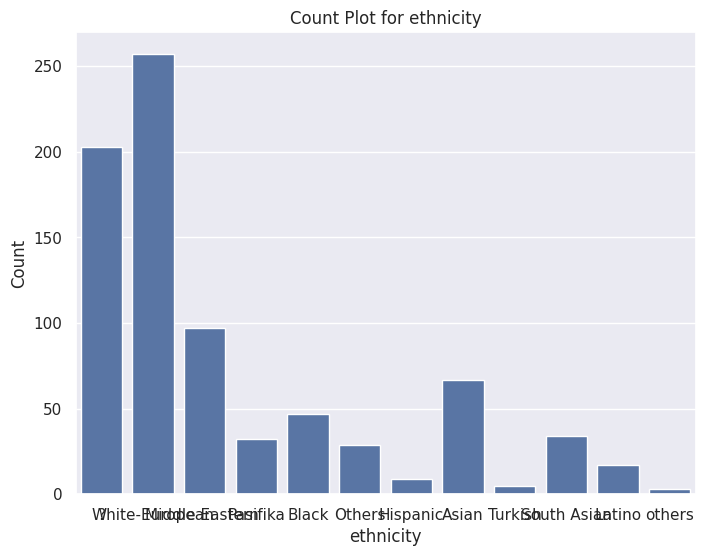

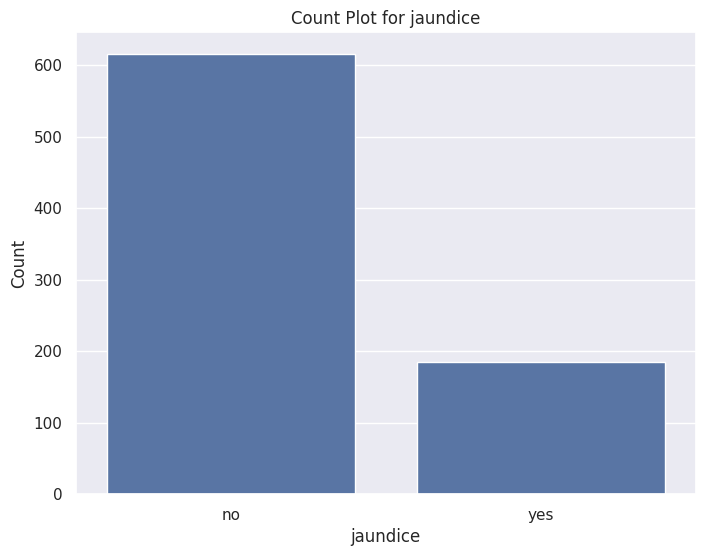

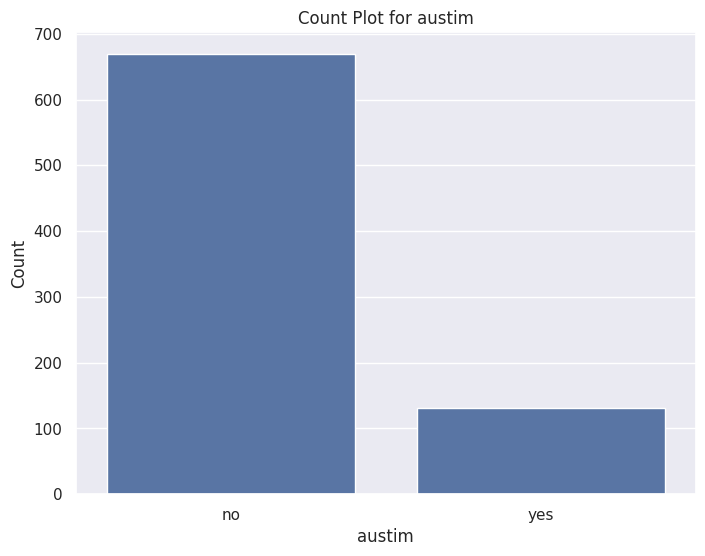

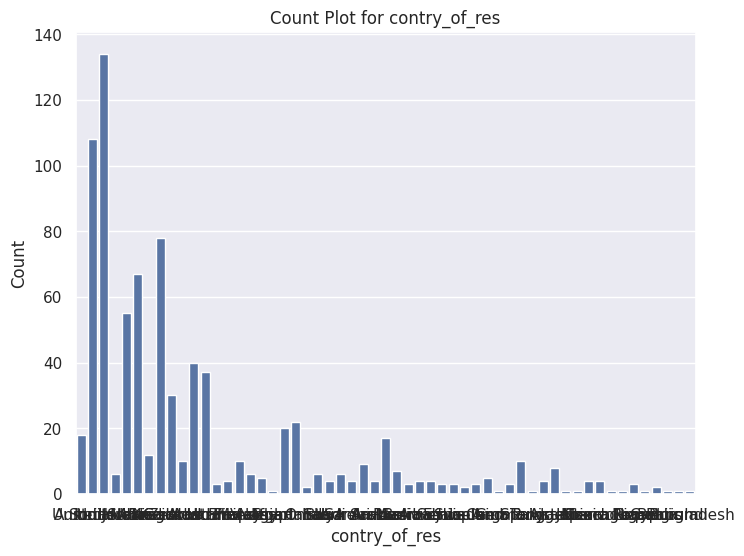

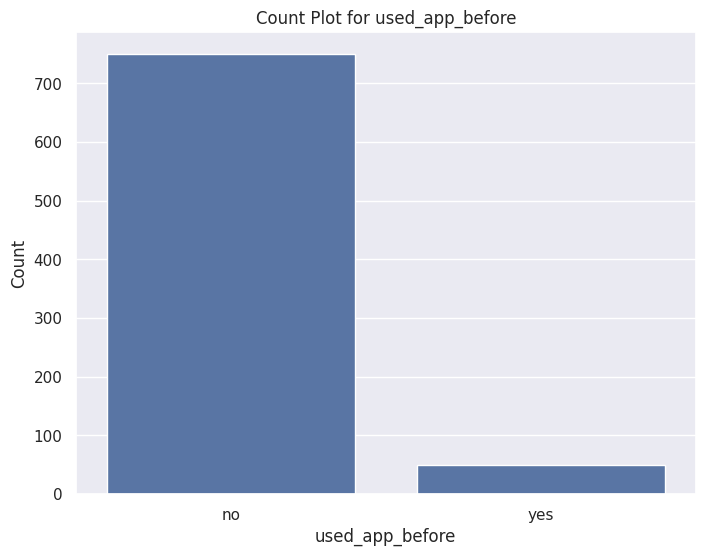

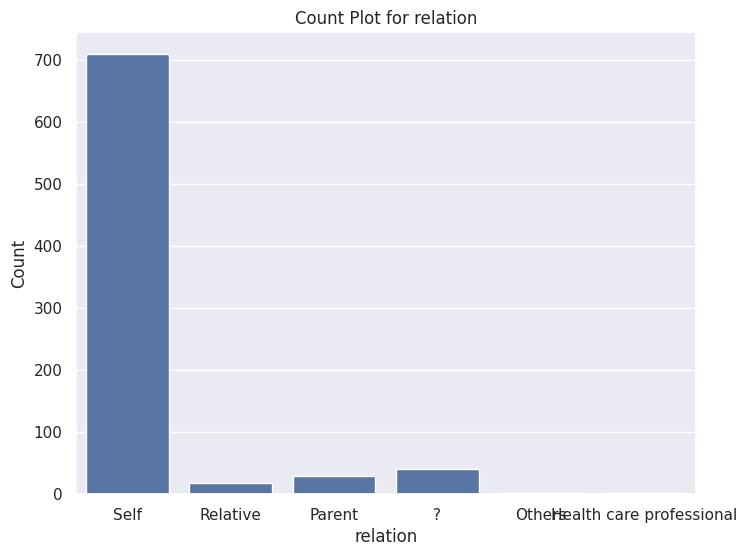

In [ ]:
# Univariate analysis on categorical features
categorical_columns=['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation']

for col in categorical_columns:
  plt.figure(figsize=(8,6))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

Text(0.5, 0, 'Class/ASD')

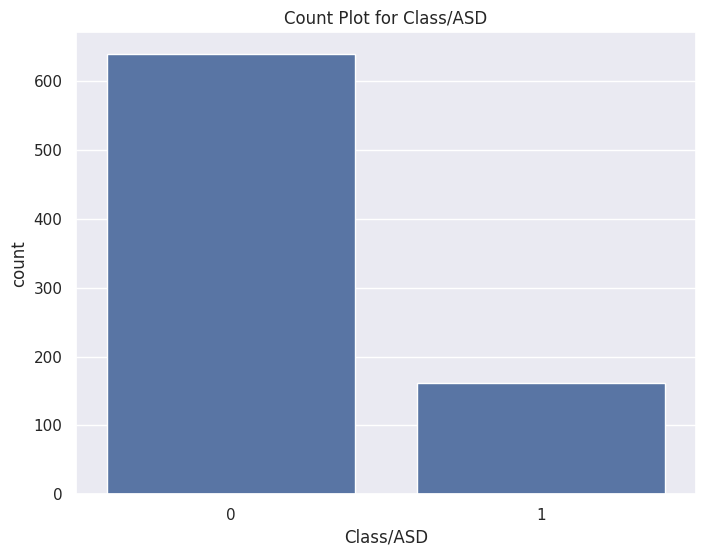

In [ ]:
# countplot for target column
plt.figure(figsize=(8,6))
sns.countplot(x=df['Class/ASD'])
plt.title(f"Count Plot for Class/ASD")
plt.xlabel('Class/ASD')

In [ ]:
df['ethnicity']=df['ethnicity'].replace({'?':"Others","others":"Others"})

In [ ]:
df['relation'].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [ ]:
df['relation']=df['relation'].replace({'?':'Others',
                                       'Relative':'Others',
                                       'Parent':'Others',
                                       'Health care professional':'Others'

                                       })



In [ ]:
df['ethnicity'].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [ ]:
df['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [ ]:
# identify columns with 'object data type
object_columns=df.select_dtypes(include='object').columns

In [ ]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [ ]:
# initialize a dictionary to store the encoders
encoders={}

# apply label encoder
for col in object_columns:
  encoder=LabelEncoder()
  df[col]=encoder.fit_transform(df[col])
  encoders[col]=encoder


# Save in pickle file
with open('encoders.pkl','wb') as file:
  pickle.dump(encoders,file)


In [ ]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [ ]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0


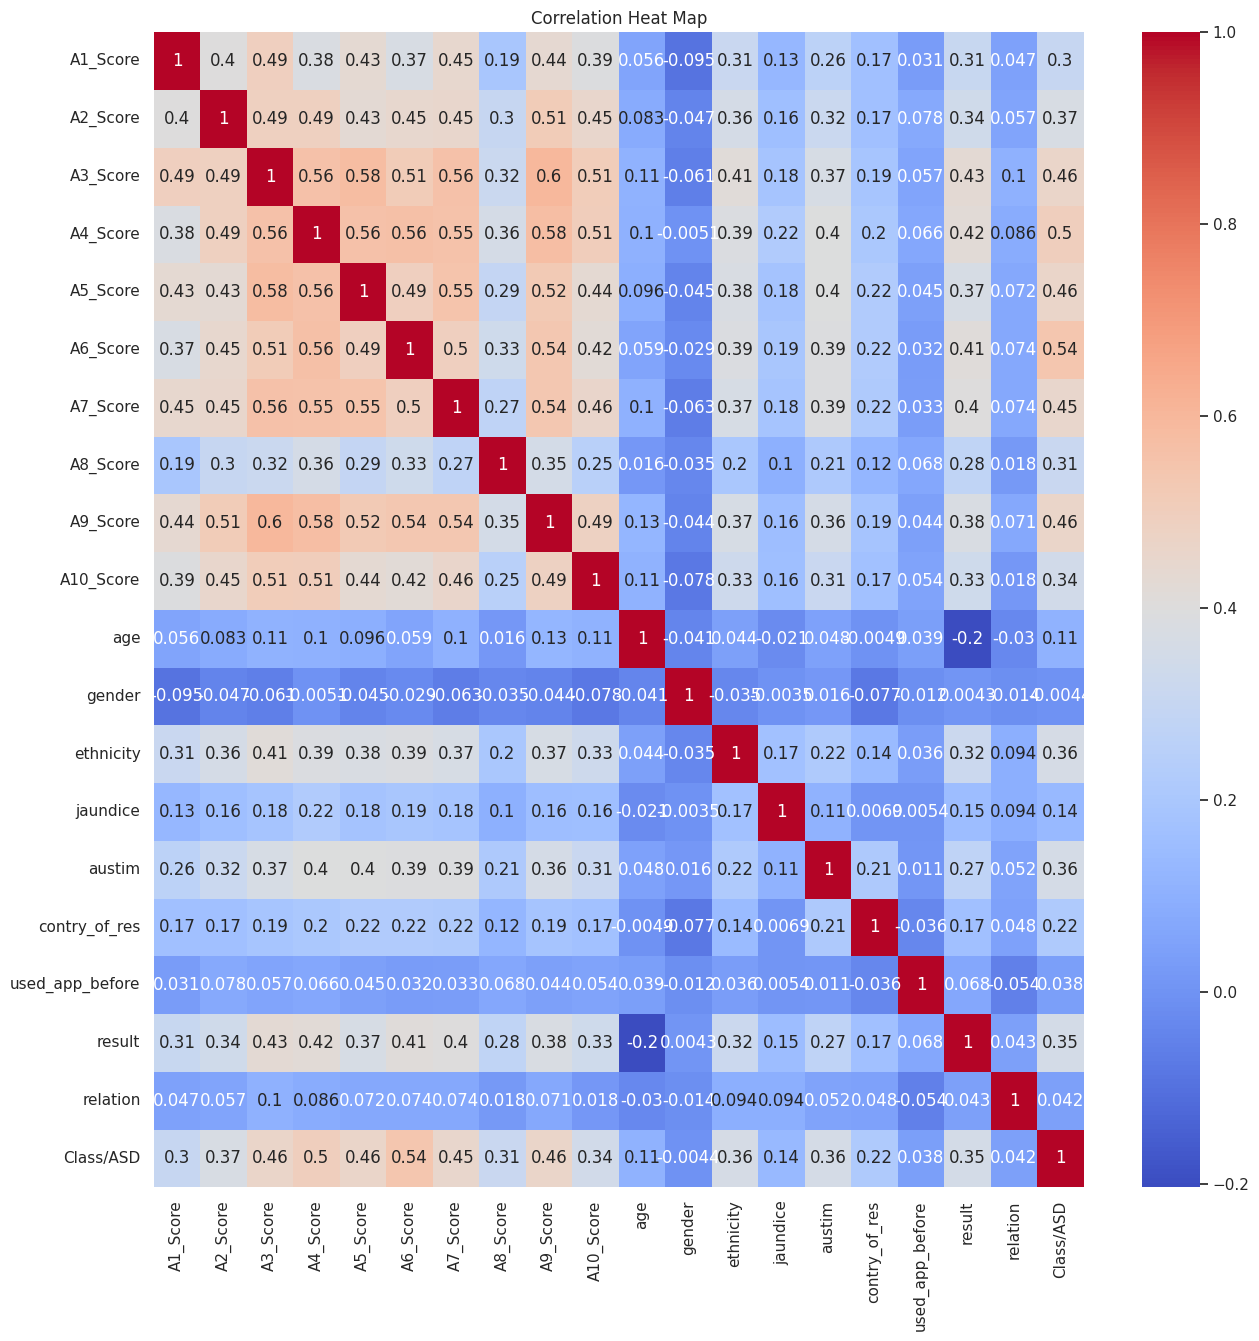

In [ ]:
# Correlation heat map
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.title("Correlation Heat Map")
plt.show()

In [ ]:
# Imbalance in target column, categorical features
# No Highly correlated features so dropped none of them

In [ ]:
# No feature scaling for tree based models
# Handle outliers
# Replace outliers with median
def replace_outliers_with_median(df,column):
  q1=df[column].quantile(0.25)
  q3=df[column].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-(1.5*iqr)
  upper_bound=q3+(1.5*iqr)

  median = df[column].median()

  df[column]=df[column].apply(lambda x: median if x<lower_bound or x>upper_bound else x)

  return df


In [ ]:
# replace outliers in age
df=replace_outliers_with_median(df,'age')
df=replace_outliers_with_median(df,'result')

In [ ]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0


In [ ]:
# Train Test Split
X=df.drop(columns=['Class/ASD'])
Y=df['Class/ASD']
print(X)
print(Y)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
print(Y_train.shape)
print(Y_test.shape)

(640,)
(160,)


In [ ]:
Y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [ ]:
# SMOTE (Synthetic Minority OverSampling Technique)
smote=SMOTE(random_state=42)
X_train_smote,Y_train_smote=smote.fit_resample(X_train,Y_train)

In [ ]:
Y_train_smote.shape

(1030,)

In [ ]:
print(Y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


In [ ]:
# Model Training

In [ ]:
# List of classifiers
models={
    'Decision Tree':DecisionTreeClassifier(random_state=42),
    'Random Forest':RandomForestClassifier(random_state=42),
    'XGBoost':XGBClassifier(random_state=42)
}

In [ ]:
# dictionary to store cross_val score
cv_scores={}

# perform 5-fold cross validation for each model
for model_name,model in models.items():
  print(f"Training {model_name} with default parameters")
  scores=cross_val_score(model,X_train_smote,Y_train_smote,cv=5,scoring='accuracy')
  cv_scores[model_name]=scores.mean()
  print(f"{model_name} CV Score: {scores.mean()}")
  print("-"*50)

Training Decision Tree with default parameters
Decision Tree CV Score: 0.8446601941747571
--------------------------------------------------
Training Random Forest with default parameters
Random Forest CV Score: 0.916504854368932
--------------------------------------------------
Training XGBoost with default parameters
XGBoost CV Score: 0.8970873786407768
--------------------------------------------------


In [ ]:
cv_scores

{'Decision Tree': 0.8446601941747571,
 'Random Forest': 0.916504854368932,
 'XGBoost': 0.8970873786407768}

In [ ]:
# Model Selection and Hyper Parameter Tuning
decision_tree=DecisionTreeClassifier(random_state=42)
random_forest=RandomForestClassifier(random_state=42)
xgboost_classifier=XGBClassifier(random_state=42)

In [ ]:
# HYperParameter grids for RandomSearchCV
param_grid_dt={
    'criterion':['gini','entropy'],
    'max_depth':[None,10,20,30,50,70],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

param_grid_rf={
    'criterion':['gini','entropy'],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'bootstrap':[True,False]
}

param_grid_xgb={
    'n_estimators':[50,100,200,500],
    'max_depth': [3,5,7,10],
    'learning_rate':[0.01,0.1,0.2,0.3],
    'subsample':[0.5,0.7,1.0],
    'colsample_bytree':[0.5,0.7,1.0]

}

random_search_dt=RandomizedSearchCV(estimator=decision_tree,param_distributions=param_grid_dt,n_iter=20,cv=5,scoring='accuracy',random_state=42)
random_search_rf=RandomizedSearchCV(estimator=random_forest,param_distributions=param_grid_rf,n_iter=20,cv=5,scoring='accuracy',random_state=42)
random_search_xgb=RandomizedSearchCV(estimator=xgboost_classifier,param_distributions=param_grid_xgb,n_iter=20,cv=5,scoring='accuracy',random_state=42)


In [ ]:
# fit model
random_search_dt.fit(X_train_smote,Y_train_smote)
random_search_rf.fit(X_train_smote,Y_train_smote)
random_search_xgb.fit(X_train_smote,Y_train_smote)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [ ]:
# Get the best model
best_model = None
best_score=0

if random_search_dt.best_score_>best_score:
  best_model=random_search_dt.best_estimator_
  best_score=random_search_dt.best_score_

if random_search_rf.best_score_>best_score:
  best_model=random_search_rf.best_estimator_
  best_score=random_search_rf.best_score_

if random_search_xgb.best_score_>best_score:
  best_model=random_search_xgb.best_estimator_
  best_score=random_search_xgb.best_score_


print(best_model)
print(best_score)



RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_split=5,
                       random_state=42)
0.925242718446602


In [ ]:
# Save best model
with open('best_model.pkl','wb') as file:
  pickle.dump(best_model,file)

In [ ]:
# Evaluate on test data
Y_test_Pred = best_model.predict(X_test)
print(classification_report(Y_test,Y_test_Pred))
print(confusion_matrix(Y_test,Y_test_Pred))
print(accuracy_score(Y_test,Y_test_Pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       124
           1       0.61      0.69      0.65        36

    accuracy                           0.83       160
   macro avg       0.76      0.78      0.77       160
weighted avg       0.84      0.83      0.83       160

[[108  16]
 [ 11  25]]
0.83125
